In [1]:
# import package we going to use in dataset
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import tensorflow as tf
import os

In [2]:
# read dataset
df=pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
# lets check out the types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
#first five rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# changed: get dummies of columns going to used in dataset

In [5]:
get_dummies = pd.get_dummies(df, columns = ['gender', 'Partner', 'Dependents','PhoneService',
                                       'MultipleLines','InternetService','OnlineSecurity',
                                       'OnlineBackup','DeviceProtection','TechSupport',
                                       'StreamingTV','StreamingMovies','Contract','PaperlessBilling',
                                       'PaymentMethod','Churn'], drop_first = True)

get_dummies["TotalCharges"] = pd.to_numeric(get_dummies.TotalCharges, errors='coerce')

get_dummies["TotalCharges"] = get_dummies['TotalCharges'].fillna(0)

In [6]:
#drop id column
get_dummies = get_dummies.drop(columns = "customerID")

In [7]:
get_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [8]:
X = get_dummies.copy()
y = get_dummies['Churn_Yes']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

# changed: simply give two dense layers; add a dropout layer to prevent overfitting

In [10]:
import keras.models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

model = Sequential()

model.add(Dense(64, activation=tf.nn.relu,input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dense(1, activation=tf.nn.sigmoid))

model.compile(optimizer=tf.train.AdamOptimizer(),loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 6,273
Trainable params: 6,273
Non-trainable params: 0
_________________________________________________________________


Using TensorFlow backend.


# changed: increase batch size up to 30 to increase trainning speed, also give more epochs

In [11]:
his = model.fit(X_train,y_train,batch_size=30,epochs=50,validation_split=0.2)

Train on 4507 samples, validate on 1127 samples
Epoch 1/50
4507/4507 [==============================] - 0s 90us/step - loss: 3.6613 - acc: 0.7187 - val_loss: 3.2431 - val_acc: 0.7666
Epoch 2/50
4507/4507 [==============================] - 0s 32us/step - loss: 3.2224 - acc: 0.7479 - val_loss: 2.9677 - val_acc: 0.7657
Epoch 3/50
4507/4507 [==============================] - 0s 28us/step - loss: 3.0749 - acc: 0.7566 - val_loss: 2.8815 - val_acc: 0.7693
Epoch 4/50
4507/4507 [==============================] - 0s 28us/step - loss: 3.0034 - acc: 0.7566 - val_loss: 2.7119 - val_acc: 0.7791
Epoch 5/50
4507/4507 [==============================] - 0s 32us/step - loss: 2.9867 - acc: 0.7508 - val_loss: 2.5960 - val_acc: 0.7915
Epoch 6/50
4507/4507 [==============================] - 0s 31us/step - loss: 2.8746 - acc: 0.7595 - val_loss: 2.7525 - val_acc: 0.7551
Epoch 7/50
4507/4507 [==============================] - 0s 28us/step - loss: 2.7278 - acc: 0.7695 - val_loss: 2.4441 - val_acc: 0.7507
Epoch 8

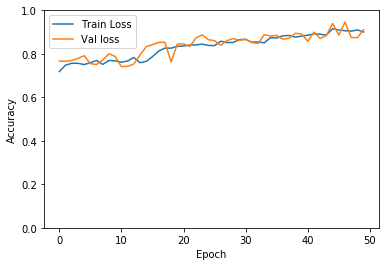

In [12]:
import matplotlib.pyplot as plt


def plot_history(his):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(his.epoch, np.array(his.history['acc']),
           label='Train Loss')
  plt.plot(his.epoch, np.array(his.history['val_acc']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0, 1])

plot_history(his)